In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.optimize import minimize

In [3]:
import scipy.optimize 

In [2]:
actions_space = np.arange(1.15, 2.4, 0.05)
# actions_space = np.linspace(1.0, 2.5, 20)
n_actions = actions_space.size
n_agents = 2
quality = np.ones(2)*2
margin_cost = np.ones(2)
margin_cost[1] = 0.5
horizon = 1/4
a0 = 0

In [7]:
actions_space[5]

1.4000000000000001

In [5]:
import sympy as sym

In [6]:
x = sym.Symbol('x')
y = sym.Symbol('y')
sym.diff((x - 1)*sym.exp((2 - x)*4)/(sym.exp((2 - x)*4) + sym.exp((2 - x)*4) + 1), x)

-4*(x - 1)*exp(8 - 4*x)/(2*exp(8 - 4*x) + 1) + 8*(x - 1)*exp(16 - 8*x)/(2*exp(8 - 4*x) + 1)**2 + exp(8 - 4*x)/(2*exp(8 - 4*x) + 1)

In [21]:
mu = 0.25
c = np.ones(2)
c[1] = 0.5
sym.nsolve([sym.diff((x - c[0])*sym.exp((2 - x)/mu)/(sym.exp((2 - x)/mu) + sym.exp((2 - y)/mu) + 1), x),
            sym.diff((y - c[1])*sym.exp((2 - y)/mu)/(sym.exp((2 - x)/mu) + sym.exp((2 - y)/mu) + 1), y)], 
           [x, y], [1, 1])

Matrix([
[1.37232666249679],
[1.20377234597973]])

In [22]:
# Method 2
from sympy.utilities.lambdify import lambdify
from scipy.optimize import fsolve
dif1 = lambdify((x,y), sym.diff((x - c[0])*sym.exp((2 - x)/mu)/(sym.exp((2 - x)/mu) + sym.exp((2 - y)/mu) + 1), x))
dif2 = lambdify((x,y), sym.diff((y - c[1])*sym.exp((2 - y)/mu)/(sym.exp((2 - x)/mu) + sym.exp((2 - y)/mu) + 1), y))
def equations(p):
    a, b = p
    return (dif1(a, b), dif2(a, b))

a, b =  fsolve(equations, (1, 1))
print(equations((a, b)))

(1.8551826741486366e-13, 1.7119639039719914e-13)


In [23]:
a, b

(1.3723266624965957, 1.203772345979548)

In [ ]:
# def diff(p):
#     y = np.exp(4*(2 - p))/(1 + np.exp(4*(2 - p)) + np.exp(4*(2 - p))) + \
#     (4*np.exp(8*(2 - p))*(-1 + p))/(1 + np.exp(4*(2 - p)) + np.exp(4*(2 - p)))**2 -\
#     (4*np.exp(4*(2 - p))*(-1 + p))/(1 + np.exp(4*(2 - p)) + np.exp(4*(2 - p)))
#     return y
# scipy.optimize.broyden1(diff, [2], f_tol=1e-14)

In [15]:
def reward_joint(price):
    # Compute joint profits for all agents
    demand = np.exp((quality - price)/horizon)
    demand = demand/(np.sum(demand)+np.exp(a0/horizon))
    reward = np.sum(np.multiply(price - margin_cost, demand))
    return -reward

In [24]:
x0 = np.array([1, 1])
res = minimize(reward_joint, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -0.948402
         Iterations: 67
         Function evaluations: 128


In [25]:
res.x

array([2.19840249, 1.69840249])

In [5]:
def reward_comp(action):
    # Compute profits for all agents
    # Input: actions taken by all agents, shape: n_agents; value: from actions_space = np.array(0, 50, 0.1)
    # Output: profits for all agents, n_agents
    price = actions_space[action]
    demand = np.exp((quality - price) / horizon)
    demand = demand / (np.sum(demand) + np.exp(a0 / horizon))
    reward = np.multiply(price - margin_cost, demand)
    return reward

In [6]:
reward_heat0 = np.zeros((n_actions, n_actions))
for i in range(n_actions):
    for j in range(n_actions):
        reward_heat0[i, j] = reward_comp([i, j])[0]
reward_heat1 = np.zeros((n_actions, n_actions))
for i in range(n_actions):
    for j in range(n_actions):
        reward_heat1[i, j] = reward_comp([i, j])[1]

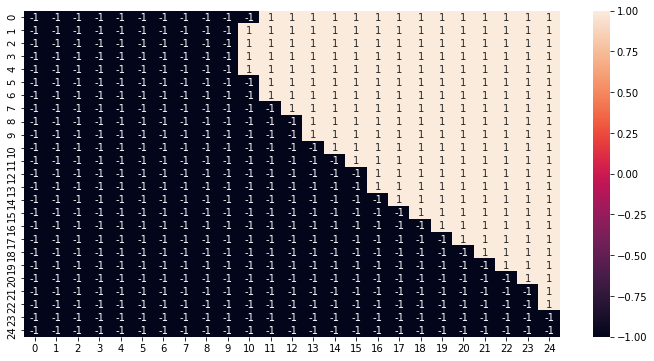

In [8]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(np.sign(reward_heat0 - reward_heat1), annot=True)
plt.show()

In [14]:
for i in range(n_actions):
    print(i, reward_comp([16, i]))

0 [0.03605141 0.60513782]
1 [0.04337054 0.64187838]
2 [0.05201667 0.67531239]
3 [0.06216273 0.70479388]
4 [0.07397655 0.72961904]
5 [0.08760812 0.74905051]
6 [0.10317354 0.7623551 ]
7 [0.12073644 0.7688557 ]
8 [0.14028843 0.76799556]
9 [0.16173156 0.7594097 ]
10 [0.18486635 0.74299429]
11 [0.20938888 0.71896168]
12 [0.23490014 0.68786827]
13 [0.26092811 0.65060487]
14 [0.28696091 0.60834605]
15 [0.31248628 0.56246341]
16 [0.33703113 0.51441593]
17 [0.36019483 0.46563566]
18 [0.3816716  0.41742662]
19 [0.40125998 0.37089035]
20 [0.41886022 0.32688416]
21 [0.43446244 0.28601122]
22 [0.44812907 0.2486361 ]
23 [0.45997543 0.21491724]
24 [0.47015103 0.18484783]


In [43]:
actions_space[21]

2.200000000000001

In [68]:
actions_space[12]

1.7500000000000004

In [65]:
#[21, 11] is perfect monopoply 
#[5, 1] is Bertrand equilibrium
#[8, 9] is classic loss
# classic
#[16, 19] is deep loss
#[5, 1] is deep
(np.mean(reward_comp([12, 9])) - np.mean(reward_comp([5, 1])))/\
(np.mean(reward_comp([21, 11])) - np.mean(reward_comp([5, 1])))

0.7626567388199937

In [39]:
np.divide(reward_comp([15, 11]), reward_comp([5, 1]))

array([1.91525892, 1.45924489])

In [40]:
reward_comp([15, 11])

array([0.2310144 , 0.68550935])

In [38]:
(reward_comp([15, 11])[0]/reward_comp([15, 11])[1])/(reward_comp([5, 1])[0]/reward_comp([5, 1])[1])

1.3124999999999998

In [30]:
reward_comp([16, 19])

array([0.40125998, 0.37089035])